In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 35

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
X_dataset[0].shape

(42,)

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 35)                2275      
                                                                 
Total params: 16,035
Trainable params: 16,035
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/50
46/66 [===================>..........] - ETA: 0s - loss: 3.3898 - accuracy: 0.0915   
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
66/66 [==============================] - 1s 7ms/step - loss: 3.2916 - accuracy: 0.1147 - val_loss: 2.8233 - val_accuracy: 0.2768
Epoch 2/50
53/66 [=======================>......] - ETA: 0s - loss: 2.4947 - accuracy: 0.3057
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
66/66 [==============================] - 0s 4ms/step - loss: 2.4149 - accuracy: 0.3203 - val_loss: 1.8146 - val_accuracy: 0.5696
Epoch 3/50
52/66 [======================>.......] - ETA: 0s - loss: 1.7278 - accuracy: 0.4706
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
66/66 [==============================] - 0s 4ms/step - loss: 1.6676 - accuracy: 0.4867 - val_loss: 1.2268 - val_accuracy: 0.7018
Epoch 4/50
49/66 [=====================>........] - ETA: 0s - loss: 1.2844 - accuracy: 0.6081
Epoch 

51/66 [======================>.......] - ETA: 0s - loss: 0.1698 - accuracy: 0.9452
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
66/66 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9447 - val_loss: 0.0966 - val_accuracy: 0.9674
Epoch 29/50
51/66 [======================>.......] - ETA: 0s - loss: 0.1573 - accuracy: 0.9519
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
66/66 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9521 - val_loss: 0.0899 - val_accuracy: 0.9692
Epoch 30/50
51/66 [======================>.......] - ETA: 0s - loss: 0.1633 - accuracy: 0.9475
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
66/66 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9472 - val_loss: 0.0912 - val_accuracy: 0.9660
Epoch 31/50
50/66 [=====================>........] - ETA: 0s - loss: 0.1565 - accuracy: 0.9480
Epoch 31: savi

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

22/22 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9796


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.7363618e-27 1.4594820e-28 6.3559996e-20 4.5021135e-12 5.4985823e-05
 4.2752467e-06 8.3734303e-14 3.2134644e-14 2.8520791e-04 1.9193641e-17
 1.5072348e-11 4.3933633e-06 9.9328423e-01 3.1423472e-19 4.2724362e-09
 2.7169079e-12 1.9215131e-22 2.2876556e-09 2.9131309e-13 1.8765516e-13
 1.5598245e-10 5.4303059e-12 1.1687131e-11 3.7103899e-14 3.4594543e-21
 9.2485681e-07 1.0509520e-07 1.0842701e-17 1.3793399e-13 5.5856803e-10
 1.0569326e-18 5.5686229e-08 1.3366136e-06 6.3644857e-03 1.3693146e-15]
12


# Confusion matrix

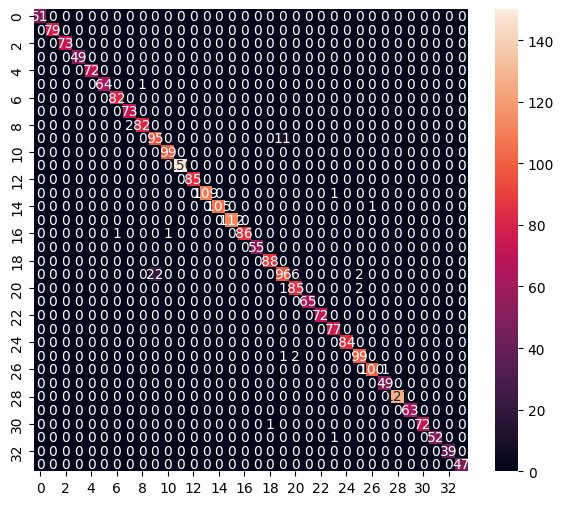

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        72
           5       1.00      0.98      0.99        65
           6       0.99      1.00      0.99        82
           7       0.97      1.00      0.99        73
           8       0.99      0.98      0.98        84
           9       0.81      0.90      0.85       106
          10       0.99      1.00      0.99        99
          11       1.00      1.00      1.00       150
          12       1.00      1.00      1.00        85
          13       1.00      0.99      1.00       110
          14       1.00      0.99      1.00       106
          15       1.00      1.00      1.00       112
          16       1.00      0.98      0.99        88
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MOBILA~1\AppData\Local\Temp\tmpsey57ypz\assets


18784

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.15953735e-27 1.34986275e-28 4.23464032e-20 3.44066464e-12
 5.89733718e-05 4.11935116e-06 8.28614860e-14 3.85813817e-14
 2.92414014e-04 2.12916803e-17 1.37038922e-11 3.37459937e-06
 9.92905855e-01 3.61876655e-19 5.83064841e-09 3.01731817e-12
 1.76356267e-22 2.39511255e-09 3.28052472e-13 1.81338546e-13
 1.52425017e-10 4.92079511e-12 1.28644838e-11 5.29938303e-14
 3.43498341e-21 1.14572686e-06 1.09931314e-07 1.35750761e-17
 1.24043896e-13 5.08941167e-10 1.18071905e-18 5.62405624e-08
 1.63668267e-06 6.73220912e-03 1.49381820e-15]
12
